In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("7817_1.csv")
data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,Score,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [3]:
df = data[["reviews.text","Score"]]
#we keep the columns we want for the analysis

In [4]:
df.head()

,reviews.text,Score
0,I initially had trouble deciding between the p...,5.0
1,Allow me to preface this with a little history...,5.0
2,I am enjoying it so far. Great for reading. Ha...,4.0
3,I bought one of the first Paperwhites and have...,5.0
4,I have to say upfront - I don't like coroporat...,5.0


In [5]:
df=df[df["Score"].isnull()!=True]
df.index.names = ['old_index']
df = df.reset_index()
df = df.drop(['old_index'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 2 columns):
reviews.text    1177 non-null object
Score           1177 non-null float64
dtypes: float64(1), object(1)
memory usage: 18.5+ KB


In [6]:
df.Score.value_counts()

5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: Score, dtype: int64

In [8]:
df.Score[df['Score']==5.0] = "Positive"
df.Score[df['Score']==4.0] = "Positive"
df.Score[df['Score']==3.0] = "Neutral"
df.Score[df['Score']==2.0] = "Negative"
df.Score[df['Score']==1.0] = "Negative"

In [9]:
df.head()

,reviews.text,Score
0,I initially had trouble deciding between the p...,Positive
1,Allow me to preface this with a little history...,Positive
2,I am enjoying it so far. Great for reading. Ha...,Positive
3,I bought one of the first Paperwhites and have...,Positive
4,I have to say upfront - I don't like coroporat...,Positive


In [10]:
from sklearn.utils import resample

pos_class = df[df['Score']=="Positive"]
neut_class = df[df['Score']=="Neutral"]
neg_class = df[df['Score']=="Negative"]

#same number of samples as majority classes
neut_class_resampled = resample(neut_class,replace=True, n_samples=pos_class.Score.count(), random_state=1) 
neg_class_resampled = resample(neg_class,replace=True, n_samples=pos_class.Score.count(), random_state=1) 

data_resampled = pd.concat([pos_class, neut_class_resampled, neg_class_resampled])

data_resampled['Score'].value_counts()

Positive    977
Neutral     977
Negative    977
Name: Score, dtype: int64

In [11]:
df = data_resampled

In [12]:
df.index.names = ['old_index']
df = df.reset_index()
df = df.drop(['old_index'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 2 columns):
reviews.text    2931 non-null object
Score           2931 non-null object
dtypes: object(2)
memory usage: 45.9+ KB


In [13]:
df['length'] = df['reviews.text'].str.len()

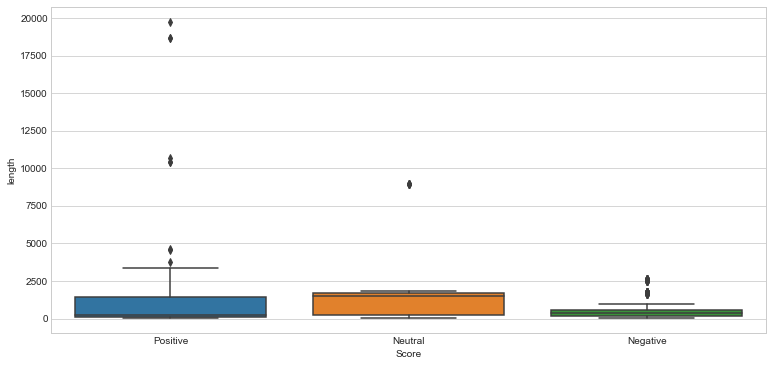

In [14]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Score', y='length');

Text(0.5,1,'News length distribution')

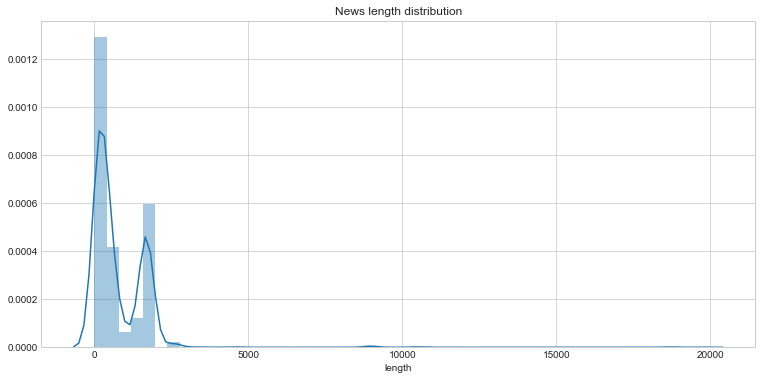

In [15]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length']).set_title('News length distribution')

In [16]:
df['length'].describe()

count     2931.000000
mean       763.690549
std       1047.329180
min          3.000000
25%        156.000000
50%        384.000000
75%       1611.000000
max      19739.000000
Name: length, dtype: float64

In [17]:
quantile_95 = df['length'].quantile(0.95)
df_95 = df[df['length'] < quantile_95]

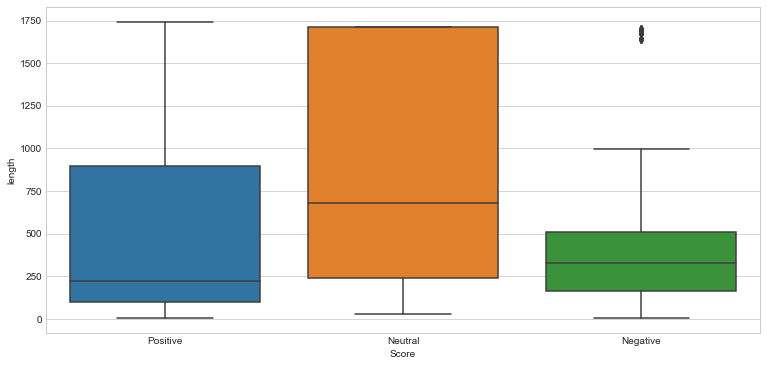

In [18]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Score', y='length');

Text(0.5,1,'News length distribution')

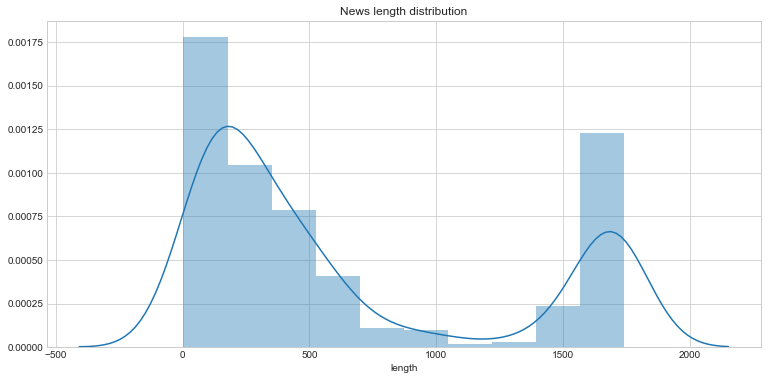

In [19]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['length']).set_title('News length distribution')

Text(0.5,1,'Positive reviews length distribution')

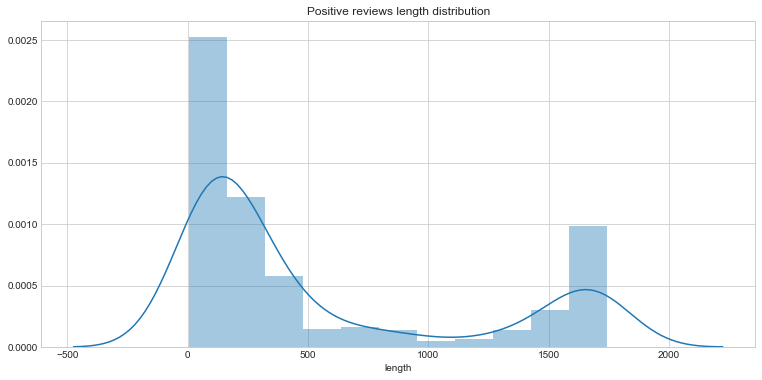

In [20]:
positive_reviews = df_95["Score"]=="Positive"
plt.figure(figsize=(12.8,6))
sns.distplot(df_95.length[positive_reviews]).set_title('Positive reviews length distribution')

Text(0.5,1,'Negative reviews length distribution')

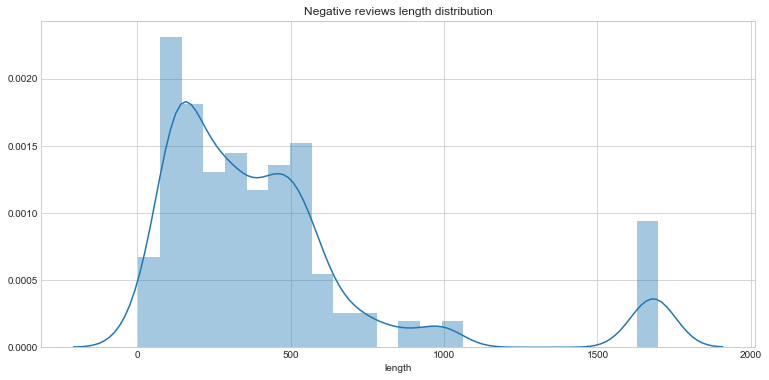

In [21]:
negative_reviews = df_95["Score"]=="Negative"
plt.figure(figsize=(12.8,6))
sns.distplot(df_95.length[negative_reviews]).set_title('Negative reviews length distribution')

Text(0.5,1,'Neutral reviews length distribution')

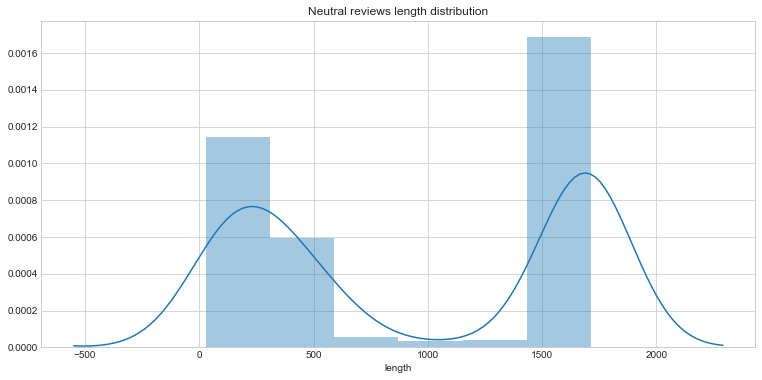

In [22]:
neutral_reviews = df_95["Score"]=="Neutral"
plt.figure(figsize=(12.8,6))
sns.distplot(df_95.length[neutral_reviews]).set_title('Neutral reviews length distribution')

# Text cleaning and preparation


## Special character cleaning¶


In [23]:
#\r,\n removal
df['reviews'] = df['reviews.text'].str.replace("\r", " ")
df['reviews'] = df['reviews'].str.replace("\n", " ")
df['reviews'] = df['reviews'].str.replace("    ", " ")

In [24]:
df['reviews'] = df['reviews'].str.replace('"', '')

## Upcase/Downcase

In [25]:
#we downcase cause Thomas and thomas is the same word
df['reviews'] = df['reviews'].str.lower()

## Punctuation Signs


In [26]:
#punctuation signs removal cause they wont affect the sentiment prediction
punctuation_signs = list("?:!.,;")
df['reviews'] = df['reviews']

for punct_sign in punctuation_signs:
    df['reviews'] = df['reviews'].str.replace(punct_sign, '')

## Possessive pronouns

In [27]:
#we remove possessive pronouns
df['reviews'] = df['reviews'].str.replace("'s", "")

## Stemming and Lemmatization

In [28]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ferfi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ferfi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
#save lemma into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [30]:
df.head()

,reviews.text,Score,length,reviews
0,I initially had trouble deciding between the p...,Positive,1064,i initially had trouble deciding between the p...
1,Allow me to preface this with a little history...,Positive,1424,allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...,Positive,182,i am enjoying it so far great for reading had ...
3,I bought one of the first Paperwhites and have...,Positive,1671,i bought one of the first paperwhites and have...
4,I have to say upfront - I don't like coroporat...,Positive,1916,i have to say upfront - i don't like coroporat...


In [31]:
#In order to lemmatize, we have to iterate through every word
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['reviews']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [32]:
df['reviews'] = lemmatized_text_list

In [33]:
for i in range(df.shape[0]):
    print(df["reviews.text"][i])
    print("\n")
    print("Transformed to:")
    print("\n")
    print(df.reviews[i])
    break

I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cus

## Stop Words

In [34]:
# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferfi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stop_words = list(stopwords.words('english'))
#for example
#i love cooking = example, word = i
#so after the following code in the end we will have output = love cooking

In [36]:
df['reviews'] = df['reviews']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['reviews'] = df['reviews'].str.replace(regex_stopword, '')

In [37]:
for i in range(df.shape[0]):
    print(df["reviews.text"][i])
    print("\n")
    print("Transformed to:")
    print("\n")
    print(df.reviews[i])
    break

I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cus

## Label Coding

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
encoder = LabelEncoder()

df["sentiment"] = encoder.fit_transform(df["Score"])
#we give codes to every sentiment
#for example pos=2,neut=1,negat=0

In [44]:
df['sentiment'].value_counts()

1    977
2    977
0    977
Name: sentiment, dtype: int64

In [55]:
df

,reviews.text,Score,length,reviews,sentiment
0,I initially had trouble deciding between the p...,Positive,1064,initially trouble decide paperwhite voya...,2
1,Allow me to preface this with a little history...,Positive,1424,allow preface little history () casual...,2
2,I am enjoying it so far. Great for reading. Ha...,Positive,182,enjoy far great read original fire sinc...,2
3,I bought one of the first Paperwhites and have...,Positive,1671,buy one first paperwhites please c...,2
4,I have to say upfront - I don't like coroporat...,Positive,1916,say upfront - ' like coroporate hermetical...,2
5,"Had older model, that you could text to speech...",Positive,223,older model could text speech one ' like ...,2
6,This is a review of the Kindle Paperwhite laun...,Positive,10670,review kindle paperwhite launch july 2015...,2
7,I love my kindle! I got one for my fiance on h...,Positive,859,love kindle get one fiance birthday lo...,2
8,"Vraiment bon petit appareil , lger et facile d...",Positive,157,vraiment bon petit appareil lger et facile e...,2
9,Exactly what it is supposed to be. Works great...,Positive,118,exactly suppose work great love built-...,2


## Train - Test split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df['reviews'], 
                                                    df['sentiment'], 
                                                    test_size=0.20, 
                                                    random_state=8,
                                                    shuffle=True)

## Text Representation

In [60]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 4500

In [61]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)
# we transform every word into a vector

(2344, 4500)
(587, 4500)


# Algorithms for selection

## Multinomial Naive Bayes

In [62]:
import pickle #we save the accuracy in there

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [63]:
mnbc = MultinomialNB()
mnbc

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
mnbc.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
mnbc_pred = mnbc.predict(features_test)

In [66]:
#training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.887372013652


In [67]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.860306643952


In [68]:
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
             precision    recall  f1-score   support

          0       0.97      0.93      0.95       215
          1       0.97      0.65      0.77       178
          2       0.72      0.97      0.83       194

avg / total       0.89      0.86      0.86       587



In [238]:
confusion_matrix_mnbc = confusion_matrix(labels_test, mnbc_pred)
confusion_matrix_mnbc

array([[201,   3,  11],
       [  2, 115,  61],
       [  4,   1, 189]], dtype=int64)

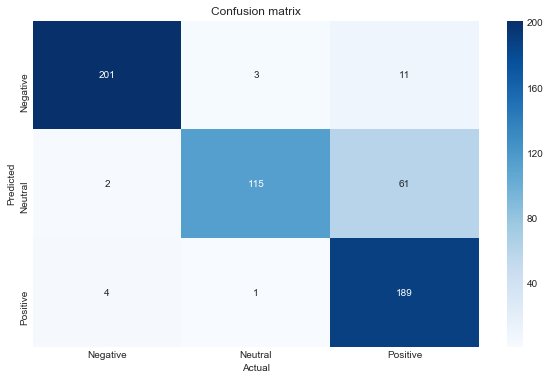

In [84]:
aux_df = df[['Score', 'sentiment']].drop_duplicates().sort_values('sentiment')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Score'].values, 
            yticklabels=aux_df['Score'].values,
            cmap="Blues",fmt= 'd')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [85]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [86]:
df_models_mnbc

,Model,Test Set Accuracy,Training Set Accuracy
0,Multinomial Naïve Bayes,0.860307,0.887372


In [87]:
with open('best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)

## Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lr = LogisticRegression(random_state=0, solver='lbfgs',
                          multi_class='multinomial')

In [90]:
lr.fit(features_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
lr_pred = lr.predict(features_test)

In [92]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, lr.predict(features_train)))

The training accuracy is: 
0.991894197952


In [93]:
print("The test accuracy is: ")
print(accuracy_score(labels_test, lr_pred))

The test accuracy is: 
0.979557069847


In [94]:
print("Classification report")
print(classification_report(labels_test,lr_pred))

Classification report
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       215
          1       0.98      0.98      0.98       178
          2       0.98      0.95      0.97       194

avg / total       0.98      0.98      0.98       587



In [95]:
confusion_matrix_lr = confusion_matrix(labels_test, lr_pred)
confusion_matrix_lr

array([[215,   0,   0],
       [  0, 175,   3],
       [  6,   3, 185]], dtype=int64)

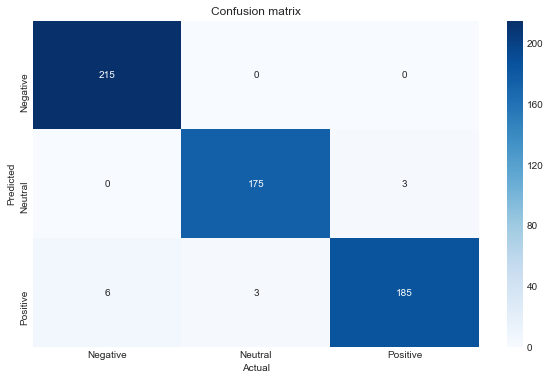

In [96]:
aux_df = df[['Score', 'sentiment']].drop_duplicates().sort_values('sentiment')
conf_matrix = confusion_matrix(labels_test, lr_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Score'].values, 
            yticklabels=aux_df['Score'].values,
            cmap="Blues",fmt= 'd')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [97]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, lr.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, lr_pred)
}

df_models_lr = pd.DataFrame(d, index=[0])

In [98]:
df_models_lr

,Model,Test Set Accuracy,Training Set Accuracy
0,Logistic Regression,0.979557,0.991894


In [99]:
with open('best_lr.pickle', 'wb') as output:
    pickle.dump(lr, output)
    
with open('df_models_lr.pickle', 'wb') as output:
    pickle.dump(df_models_lr, output)

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf = RandomForestClassifier(max_depth = None,n_estimators=10)
rf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
rf_pred = rf.predict(features_test)

In [103]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, rf.predict(features_train)))

The training accuracy is: 
0.999146757679


In [104]:
print("The test accuracy is: ")
print(accuracy_score(labels_test, rf_pred))

The test accuracy is: 
0.984667802385


In [105]:
print("Classification report")
print(classification_report(labels_test,rf_pred))

Classification report
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       215
          1       0.98      1.00      0.99       178
          2       1.00      0.95      0.98       194

avg / total       0.99      0.98      0.98       587



In [106]:
confusion_matrix_rf = confusion_matrix(labels_test, rf_pred)
confusion_matrix_rf

array([[215,   0,   0],
       [  0, 178,   0],
       [  6,   3, 185]], dtype=int64)

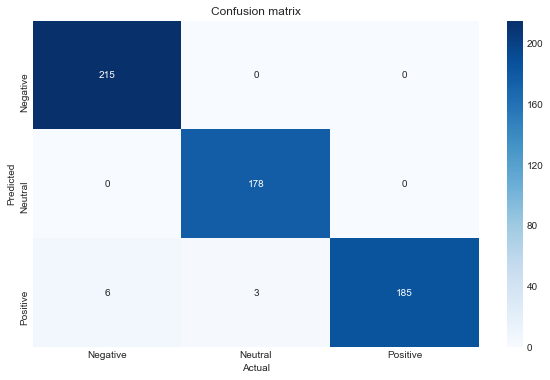

In [107]:
aux_df = df[['Score', 'sentiment']].drop_duplicates().sort_values('sentiment')
conf_matrix = confusion_matrix(labels_test, rf_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Score'].values, 
            yticklabels=aux_df['Score'].values,
            cmap="Blues",fmt= 'd')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [108]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, rf.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rf_pred)
}

df_models_rf = pd.DataFrame(d, index=[0])

In [109]:
df_models_rf

,Model,Test Set Accuracy,Training Set Accuracy
0,Random Forest,0.984668,0.999147


In [110]:
with open('best_rf.pickle', 'wb') as output:
    pickle.dump(rf, output)
    
with open('df_models_rf.pickle', 'wb') as output:
    pickle.dump(df_models_rf, output)

## Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
gbc = GradientBoostingClassifier()
gbc.fit(features_train, labels_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [113]:
gbc_pred = gbc.predict(features_test)

In [114]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, gbc.predict(features_train)))

The training accuracy is: 
0.992320819113


In [115]:
print("The test accuracy is: ")
print(accuracy_score(labels_test, gbc_pred))

The test accuracy is: 
0.962521294719


In [116]:
print("Classification report")
print(classification_report(labels_test,gbc_pred))

Classification report
             precision    recall  f1-score   support

          0       0.93      1.00      0.97       215
          1       0.96      1.00      0.98       178
          2       1.00      0.89      0.94       194

avg / total       0.96      0.96      0.96       587



In [117]:
confusion_matrix_gbc = confusion_matrix(labels_test, gbc_pred)
confusion_matrix_gbc

array([[215,   0,   0],
       [  0, 178,   0],
       [ 15,   7, 172]], dtype=int64)

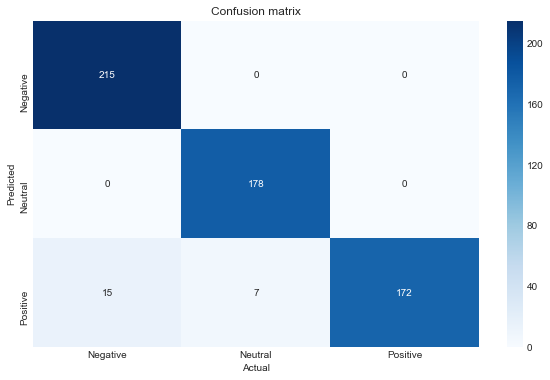

In [118]:
aux_df = df[['Score', 'sentiment']].drop_duplicates().sort_values('sentiment')
conf_matrix = confusion_matrix(labels_test, gbc_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Score'].values, 
            yticklabels=aux_df['Score'].values,
            cmap="Blues",fmt= 'd')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [119]:
d = {
     'Model': 'Gradient Boosting',
     'Training Set Accuracy': accuracy_score(labels_train, gbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, gbc_pred)
}

df_models_gbc = pd.DataFrame(d, index=[0])

In [120]:
df_models_gbc

,Model,Test Set Accuracy,Training Set Accuracy
0,Gradient Boosting,0.962521,0.992321


In [121]:
with open('best_gbc.pickle', 'wb') as output:
    pickle.dump(gbc, output)
    
with open('df_models_gbc.pickle', 'wb') as output:
    pickle.dump(df_models_gbc, output)

# Best Model Selection

In [122]:
list_pickles = [
    "df_models_gbc.pickle",
    "df_models_lr.pickle",
    "df_models_mnbc.pickle",
    "df_models_rf.pickle",
]

df_summary = pd.DataFrame()

for i in list_pickles:
        
    with open(i, 'rb') as data:
        df = pickle.load(data)

    df_summary = df_summary.append(df)

df_summary = df_summary.reset_index().drop('index', axis=1)

In [123]:
df_summary

,Model,Test Set Accuracy,Training Set Accuracy
0,Gradient Boosting,0.962521,0.992321
1,Logistic Regression,0.979557,0.991894
2,Multinomial Naïve Bayes,0.860307,0.887372
3,Random Forest,0.984668,0.999147


In [124]:
df_summary.sort_values('Test Set Accuracy', ascending=False)

,Model,Test Set Accuracy,Training Set Accuracy
3,Random Forest,0.984668,0.999147
1,Logistic Regression,0.979557,0.991894
0,Gradient Boosting,0.962521,0.992321
2,Multinomial Naïve Bayes,0.860307,0.887372


# THE END